## PUNTO 1 DE LA PRUEBA Limpieza y transformación de datos con Python

In [1]:
# IMPORTAR LIBRERIAS

import pandas as pd

In [2]:
# IMPORTAR EL CSV 

df_prueba_tecnica = pd.read_csv("C:/Users/Julian/Desktop/Csv_prueba.csv")
df_prueba_tecnica

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Julian/Desktop/Csv_prueba.csv'

In [328]:
# VER INFORMACIÓN DE LA TABLA
df_prueba_tecnica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Periodo                           447 non-null    object 
 1   Clicks                            269 non-null    float64
 2   Registros_IN                      424 non-null    float64
 3   Primer_deposito_IN                424 non-null    float64
 4   Total_depositado_IN               404 non-null    float64
 5   Numero_Personas_que_apostaron_IN  404 non-null    float64
 6   Total_apostado                    404 non-null    float64
 7   Net_revenue_IN                    404 non-null    float64
dtypes: float64(7), object(1)
memory usage: 28.1+ KB


In [330]:
# VALIDAR LOS NULOS POR COLUMNA
df_prueba_tecnica.isna().sum()

Periodo                               0
Clicks                              178
Registros_IN                         23
Primer_deposito_IN                   23
Total_depositado_IN                  43
Numero_Personas_que_apostaron_IN     43
Total_apostado                       43
Net_revenue_IN                       43
dtype: int64

In [332]:
# VALIDAR ESTADISTICAS BASICAS
df_prueba_tecnica.describe()

,Clicks,Registros_IN,Primer_deposito_IN,Total_depositado_IN,Numero_Personas_que_apostaron_IN,Total_apostado,Net_revenue_IN
count,269.000000,424.000000,424.000000,404.000000,404.000000,404.000000,404.000000
mean,1332.037175,24.716981,13.926887,4264.528193,277.868812,33410.939381,924.937252
std,2180.594419,100.916955,48.932934,4259.581067,324.975136,41727.584984,3384.336745
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.210000,-19141.060000
25%,3.000000,0.000000,0.000000,881.907500,114.750000,4434.180000,-4.607500
50%,283.000000,0.000000,1.000000,2736.445000,178.000000,16856.000000,159.635000
75%,2222.000000,4.000000,5.000000,7317.722500,220.500000,47524.795000,1765.927500
max,18707.000000,1324.000000,659.000000,23800.790000,1427.000000,289945.270000,25210.350000


In [334]:
# IMPUTAR (llenador de datos nulos)

df_prueba_tecnica["Clicks"] =  df_prueba_tecnica["Clicks"].fillna(283).astype(int) # se llena con la mediana y se convierte a enteros
df_prueba_tecnica["Registros_IN"] = df_prueba_tecnica["Registros_IN"].fillna(4) # se llena con el valor de Q3 del 75% de los datos 
df_prueba_tecnica["Primer_deposito_IN"] = df_prueba_tecnica["Primer_deposito_IN"].fillna(48.932934	) # se llena con el promedio
df_prueba_tecnica["Total_depositado_IN"] = df_prueba_tecnica["Total_depositado_IN"].fillna(2736.445) # se llena con la mediana 
df_prueba_tecnica["Numero_Personas_que_apostaron_IN"] = df_prueba_tecnica["Numero_Personas_que_apostaron_IN"].fillna(277.868812).astype(int) # se llena con la media y se pasa a enteros 
df_prueba_tecnica["Total_apostado"] = df_prueba_tecnica["Total_apostado"].fillna(16856) # se llena con la mediana
df_prueba_tecnica["Net_revenue_IN"] = df_prueba_tecnica["Net_revenue_IN"].fillna(159.635) # se llena con la mediana

In [338]:
df_prueba_tecnica.isna().sum() # sin nulos

Periodo                             0
Clicks                              0
Registros_IN                        0
Primer_deposito_IN                  0
Total_depositado_IN                 0
Numero_Personas_que_apostaron_IN    0
Total_apostado                      0
Net_revenue_IN                      0
dtype: int64

In [340]:
df_prueba_tecnica

,Periodo,Clicks,Registros_IN,Primer_deposito_IN,Total_depositado_IN,Numero_Personas_que_apostaron_IN,Total_apostado,Net_revenue_IN
0,04/08/2022,3,4.0,48.932934,2736.445,277,16856.00,159.635
1,08/08/2022,1,4.0,48.932934,2736.445,277,16856.00,159.635
2,09/08/2022,1,4.0,48.932934,2736.445,277,16856.00,159.635
3,03/11/2022,283,0.0,0.000000,194.520,1,194.52,160.480
4,04/11/2022,283,0.0,0.000000,0.000,1,44.17,6.680
...,...,...,...,...,...,...,...,...
442,22/09/2023,283,0.0,0.000000,20.340,1,60.69,16.550
443,23/09/2023,283,1.0,5.000000,10010.930,774,74746.94,3160.020
444,23/09/2023,283,0.0,0.000000,0.000,1,17.28,6.840
445,24/09/2023,283,2.0,8.000000,9435.160,891,62595.90,1938.010


In [342]:
# CONVERTIR PERIODO A FORMATO FECHA 
df_prueba_tecnica["Periodo"] = pd.to_datetime(df_prueba_tecnica["Periodo"], format='%d/%m/%Y')

In [344]:
# DESCARGAR PARA VISUALIZAR EN POWER BI

df_prueba_tecnica.to_csv("C:/Users/Julian/Desktop/Archivo_limpio.csv", index = False)

## PUNTO 2 DE LA PRUEBA PROYECCIÓN DE INGRESOS NETOS PARA LOS PROXIMOS DOS AÑOS

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

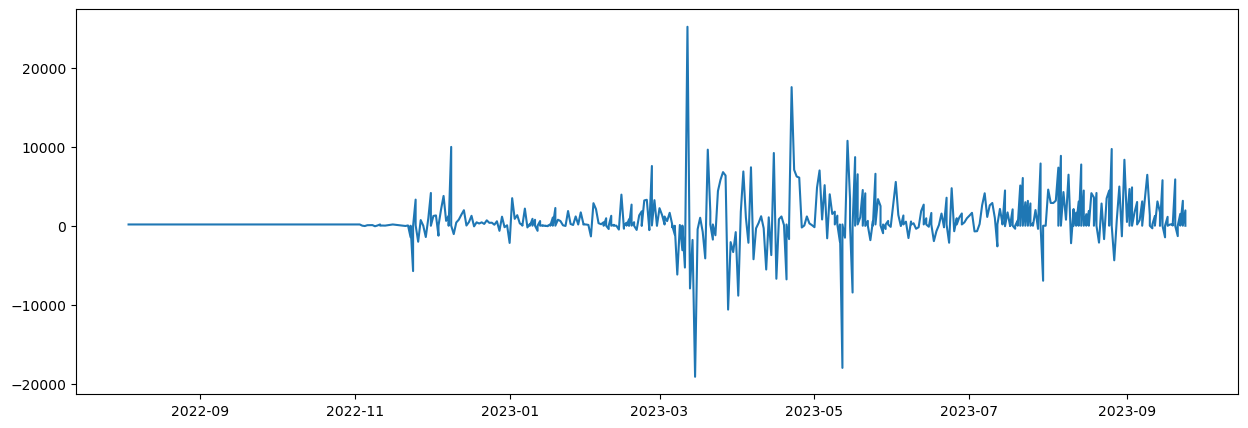

In [348]:
# VEMOS EL COMPORTAMIENTO DE REVENUE A LO LARGO DEL TIEMPO
plt.figure(figsize=(15,5))
plt.plot(df_prueba_tecnica["Periodo"],df_prueba_tecnica["Net_revenue_IN"]);

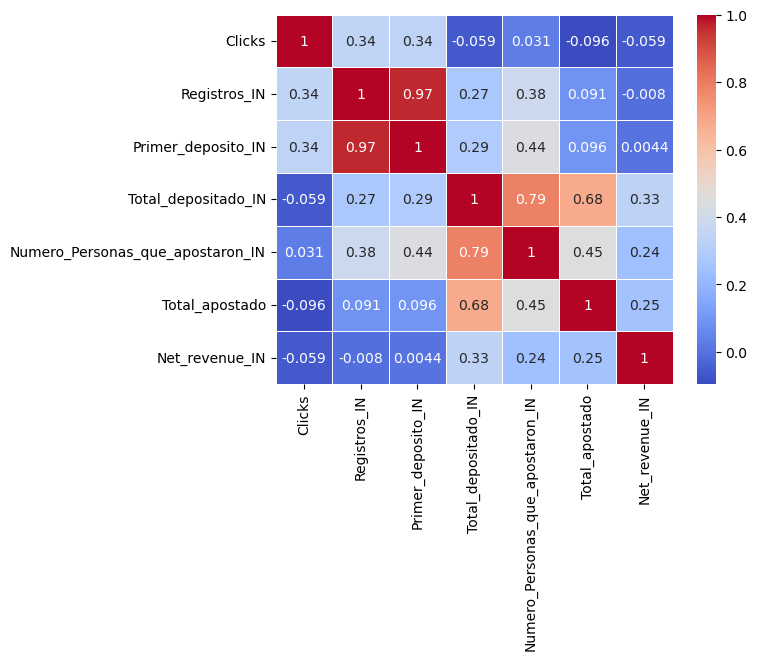

In [352]:
# SE CREA MATRIZ DE CORRELACION PARA VER QUE VARIABLES SE CORRELACIONAN MAS CON Net_revenue_IN

matrix_de_correlacion = df_prueba_tecnica[["Clicks","Registros_IN","Primer_deposito_IN","Total_depositado_IN","Numero_Personas_que_apostaron_IN","Total_apostado","Net_revenue_IN"]].corr()

sns.heatmap(matrix_de_correlacion, annot=True, cmap='coolwarm', linewidths=0.5);

#### Solo hay correlación positiva del 0.33 con Total despositado 

### DEFINIREMOS EL MODELO QUE MEJOR HAGA LA PREDICCIÓN 

In [354]:
# test
from sklearn.model_selection import train_test_split
# algoritmos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [356]:
# DEFINIMOS VARIABLES DE X independientews con las variables de mayor correlación y la variable objetivo con Net_revenue_IN
X = df_prueba_tecnica[["Clicks","Registros_IN","Primer_deposito_IN","Total_depositado_IN","Numero_Personas_que_apostaron_IN","Total_apostado"]]
y = df_prueba_tecnica["Net_revenue_IN"]
X

,Clicks,Registros_IN,Primer_deposito_IN,Total_depositado_IN,Numero_Personas_que_apostaron_IN,Total_apostado
0,3,4.0,48.932934,2736.445,277,16856.00
1,1,4.0,48.932934,2736.445,277,16856.00
2,1,4.0,48.932934,2736.445,277,16856.00
3,283,0.0,0.000000,194.520,1,194.52
4,283,0.0,0.000000,0.000,1,44.17
...,...,...,...,...,...,...
442,283,0.0,0.000000,20.340,1,60.69
443,283,1.0,5.000000,10010.930,774,74746.94
444,283,0.0,0.000000,0.000,1,17.28
445,283,2.0,8.000000,9435.160,891,62595.90


In [358]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.9, random_state=42)

In [360]:
modelos = [
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque", RandomForestRegressor(random_state=42))
]

In [362]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')

modelo lineal: 0.2213544993639056
modelo arbol: -1.5807672458223645
modelo bosque: 0.10442624291601466


#### USAREMOS LA REGRESIÓN LINEAL POR SU PRECISIÓN DEL 22%

In [365]:
# Crear columna de días desde la primera fecha
df_prueba_tecnica["Dias"] = (df_prueba_tecnica["Periodo"] - df_prueba_tecnica["Periodo"].min()).dt.days
df_prueba_tecnica

,Periodo,Clicks,Registros_IN,Primer_deposito_IN,Total_depositado_IN,Numero_Personas_que_apostaron_IN,Total_apostado,Net_revenue_IN,Dias
0,2022-08-04,3,4.0,48.932934,2736.445,277,16856.00,159.635,0
1,2022-08-08,1,4.0,48.932934,2736.445,277,16856.00,159.635,4
2,2022-08-09,1,4.0,48.932934,2736.445,277,16856.00,159.635,5
3,2022-11-03,283,0.0,0.000000,194.520,1,194.52,160.480,91
4,2022-11-04,283,0.0,0.000000,0.000,1,44.17,6.680,92
...,...,...,...,...,...,...,...,...,...
442,2023-09-22,283,0.0,0.000000,20.340,1,60.69,16.550,414
443,2023-09-23,283,1.0,5.000000,10010.930,774,74746.94,3160.020,415
444,2023-09-23,283,0.0,0.000000,0.000,1,17.28,6.840,415
445,2023-09-24,283,2.0,8.000000,9435.160,891,62595.90,1938.010,416


In [367]:
X = df_prueba_tecnica[["Dias", "Clicks", "Registros_IN", "Primer_deposito_IN", "Total_depositado_IN", "Numero_Personas_que_apostaron_IN", "Total_apostado"]]
y = df_prueba_tecnica["Net_revenue_IN"]

In [369]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.9, random_state=42)

In [371]:
lineal = LinearRegression()
lineal.fit(X, y)

LinearRegression()

#### CREAREMOS LAS PROYECCIONES

In [373]:
# Crear un DataFrame con las fechas futuras (dos años)
fechas_futuras = pd.date_range(start='2023-09-24', end='2025-09-24')

In [375]:
# Convertimos las fechas futuras a número de días desde la primera fecha
dias_futuros = (fechas_futuras - df_prueba_tecnica["Periodo"].min()).days

In [377]:
# Suponemos valores constantes o basados en la media de las otras variables para las fechas futuras
clicks_futuro = [df_prueba_tecnica["Clicks"].mean()] * len(dias_futuros)
registros_futuro = [df_prueba_tecnica["Registros_IN"].mean()] * len(dias_futuros)
primer_deposito_futuro = [df_prueba_tecnica["Primer_deposito_IN"].mean()] * len(dias_futuros)
total_depositado_futuro = [df_prueba_tecnica["Total_depositado_IN"].mean()] * len(dias_futuros)
personas_apostaron_futuro = [df_prueba_tecnica["Numero_Personas_que_apostaron_IN"].mean()] * len(dias_futuros)
total_apostado_futuro = [df_prueba_tecnica["Total_apostado"].mean()] * len(dias_futuros)

In [379]:
# Crear el DataFrame con las variables independientes futuras
Valores_futuros = pd.DataFrame({
    "Dias": dias_futuros,
    "Clicks": clicks_futuro,
    "Registros_IN": registros_futuro,
    "Primer_deposito_IN": primer_deposito_futuro,
    "Total_depositado_IN": total_depositado_futuro,
    "Numero_Personas_que_apostaron_IN": personas_apostaron_futuro,
    "Total_apostado": total_apostado_futuro
})
Valores_futuros

,Dias,Clicks,Registros_IN,Primer_deposito_IN,Total_depositado_IN,Numero_Personas_que_apostaron_IN,Total_apostado
0,416,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
1,417,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
2,418,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
3,419,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
4,420,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
...,...,...,...,...,...,...,...
727,1143,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
728,1144,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
729,1145,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063
730,1146,914.299776,23.651007,15.728093,4117.531376,277.785235,31818.406063


In [381]:
# Hacer las proyecciones
proyecciones = lineal.predict(Valores_futuros)

In [383]:
# Crear DataFrame con las proyecciones
df_futuro = pd.DataFrame({
    'Fecha': fechas_futuras,
    'Proyeccion_Net_revenue_IN': proyecciones
})

In [391]:
df_futuro

,Fecha,Proyeccion_Net_revenue_IN
0,2023-09-24,724.662461
1,2023-09-25,723.832623
2,2023-09-26,723.002786
3,2023-09-27,722.172948
4,2023-09-28,721.343111
...,...,...
727,2025-09-20,121.370582
728,2025-09-21,120.540745
729,2025-09-22,119.710907
730,2025-09-23,118.881070
